## Module 7 : Logistic Regression
### Aishwarya Deshmane

#### Introduction:

Around 14000 observations about the data gathered by an insurance company. The company wants to identify customers willing to buy a new insurance product. They gathered data about customers to whom they offered the new product.

#### Approach:
- Exploratory data analysis
- Data Preparation
- Dimensionality reduction
- Logistic Regression models
- Conclusion

In [1]:
#load the libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import math
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm

In [2]:
#read the file
path = "https://raw.githubusercontent.com/Aishwarya-Deshmane/DAV-6150/main/M7_Data.csv"
data = pd.read_csv(path)

In [3]:
data

,TARGET,loyalty,ID,age,city,LOR,prod_A,type_A,type_B,prod_B,turnover_A,turnover_B,contract,age_P,lor_M
0,Y,99,77,66,2,0,0,0,0,0,333.561114,264.721010,2,66,3
1,Y,1,159,45,2,3,1,3,3,1,394.735699,284.904978,2,45,39
2,Y,1,220,42,2,2,1,3,6,1,342.180990,1175.589721,2,42,27
3,Y,99,303,31,2,0,0,0,0,0,453.757916,242.341754,2,31,3
4,Y,99,306,62,2,0,0,0,0,0,384.577469,287.008370,2,62,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14011,Y,99,151601,30,2,0,0,0,0,0,386.434278,284.309508,2,30,3
14012,Y,1,151634,27,2,2,1,3,3,1,376.842591,266.993794,2,27,27
14013,Y,99,151679,26,2,0,0,0,0,0,434.805703,284.629361,2,26,3
14014,Y,1,151804,75,2,1,1,3,3,1,366.273857,270.573265,2,75,15


In [4]:
#check sum of the null values
data.isnull().sum()

TARGET        0
loyalty       0
ID            0
age           0
city          0
LOR           0
prod_A        0
type_A        0
type_B        0
prod_B        0
turnover_A    0
turnover_B    0
contract      0
age_P         0
lor_M         0
dtype: int64

In [5]:
#check the datatypes of the values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14016 entries, 0 to 14015
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   TARGET      14016 non-null  object 
 1   loyalty     14016 non-null  int64  
 2   ID          14016 non-null  int64  
 3   age         14016 non-null  int64  
 4   city        14016 non-null  int64  
 5   LOR         14016 non-null  int64  
 6   prod_A      14016 non-null  int64  
 7   type_A      14016 non-null  int64  
 8   type_B      14016 non-null  int64  
 9   prod_B      14016 non-null  int64  
 10  turnover_A  14016 non-null  float64
 11  turnover_B  14016 non-null  float64
 12  contract    14016 non-null  int64  
 13  age_P       14016 non-null  int64  
 14  lor_M       14016 non-null  int64  
dtypes: float64(2), int64(12), object(1)
memory usage: 1.6+ MB


No null values in the data and datatypes of all the columns looks like expected

In [6]:
#describe the data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
loyalty,14016.0,50.381778,48.471790,0.000000,2.000000,3.000000,99.000000,99.000000
ID,14016.0,37672.440068,44855.639209,1.000000,6741.500000,13514.500000,62738.000000,151811.000000
age,14016.0,35.882920,12.974634,5.000000,25.000000,33.000000,43.000000,102.000000
city,14016.0,-710.950128,26702.329184,-999999.000000,2.000000,2.000000,2.000000,235.000000
LOR,14016.0,0.926299,0.965212,0.000000,0.000000,1.000000,1.000000,6.000000
prod_A,14016.0,0.533818,0.498873,0.000000,0.000000,1.000000,1.000000,1.000000
type_A,14016.0,1.607877,1.508991,0.000000,0.000000,3.000000,3.000000,6.000000
type_B,14016.0,1.918878,1.686038,0.000000,0.000000,3.000000,3.000000,9.000000
prod_B,14016.0,0.599458,0.490026,0.000000,0.000000,1.000000,1.000000,1.000000
turnover_A,14016.0,379.161320,92.612207,300.095909,334.919412,367.891493,399.744924,5568.784139


In [7]:
#check if any duplicated rows
data.duplicated().sum()

3008

In [8]:
#checkthe duplicated rows
data[data.duplicated()]

,TARGET,loyalty,ID,age,city,LOR,prod_A,type_A,type_B,prod_B,turnover_A,turnover_B,contract,age_P,lor_M
11008,Y,99,77,66,2,0,0,0,0,0,333.561114,264.721010,2,66,3
11009,Y,1,159,45,2,3,1,3,3,1,394.735699,284.904978,2,45,39
11010,Y,1,220,42,2,2,1,3,6,1,342.180990,1175.589721,2,42,27
11011,Y,99,303,31,2,0,0,0,0,0,453.757916,242.341754,2,31,3
11012,Y,99,306,62,2,0,0,0,0,0,384.577469,287.008370,2,62,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14011,Y,99,151601,30,2,0,0,0,0,0,386.434278,284.309508,2,30,3
14012,Y,1,151634,27,2,2,1,3,3,1,376.842591,266.993794,2,27,27
14013,Y,99,151679,26,2,0,0,0,0,0,434.805703,284.629361,2,26,3
14014,Y,1,151804,75,2,1,1,3,3,1,366.273857,270.573265,2,75,15


In [9]:
#sort ID's and verify if duplicates
data[data.duplicated(keep=False)].sort_values('ID').head(20)

,TARGET,loyalty,ID,age,city,LOR,prod_A,type_A,type_B,prod_B,turnover_A,turnover_B,contract,age_P,lor_M
0,Y,99,77,66,2,0,0,0,0,0,333.561114,264.721010,2,66,3
11008,Y,99,77,66,2,0,0,0,0,0,333.561114,264.721010,2,66,3
11009,Y,1,159,45,2,3,1,3,3,1,394.735699,284.904978,2,45,39
1,Y,1,159,45,2,3,1,3,3,1,394.735699,284.904978,2,45,39
2,Y,1,220,42,2,2,1,3,6,1,342.180990,1175.589721,2,42,27
11010,Y,1,220,42,2,2,1,3,6,1,342.180990,1175.589721,2,42,27
3,Y,99,303,31,2,0,0,0,0,0,453.757916,242.341754,2,31,3
11011,Y,99,303,31,2,0,0,0,0,0,453.757916,242.341754,2,31,3
4,Y,99,306,62,2,0,0,0,0,0,384.577469,287.008370,2,62,3
11012,Y,99,306,62,2,0,0,0,0,0,384.577469,287.008370,2,62,3


Verified the 3008 duplicated rows. Delete these observations in data preparation segment

In [10]:
data['TARGET'] = data['TARGET'].replace(['Y','N'],[1,0])
data

,TARGET,loyalty,ID,age,city,LOR,prod_A,type_A,type_B,prod_B,turnover_A,turnover_B,contract,age_P,lor_M
0,1,99,77,66,2,0,0,0,0,0,333.561114,264.721010,2,66,3
1,1,1,159,45,2,3,1,3,3,1,394.735699,284.904978,2,45,39
2,1,1,220,42,2,2,1,3,6,1,342.180990,1175.589721,2,42,27
3,1,99,303,31,2,0,0,0,0,0,453.757916,242.341754,2,31,3
4,1,99,306,62,2,0,0,0,0,0,384.577469,287.008370,2,62,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14011,1,99,151601,30,2,0,0,0,0,0,386.434278,284.309508,2,30,3
14012,1,1,151634,27,2,2,1,3,3,1,376.842591,266.993794,2,27,27
14013,1,99,151679,26,2,0,0,0,0,0,434.805703,284.629361,2,26,3
14014,1,1,151804,75,2,1,1,3,3,1,366.273857,270.573265,2,75,15


In [11]:
data1 = data.drop_duplicates()

In [12]:
data1.duplicated().sum()

0

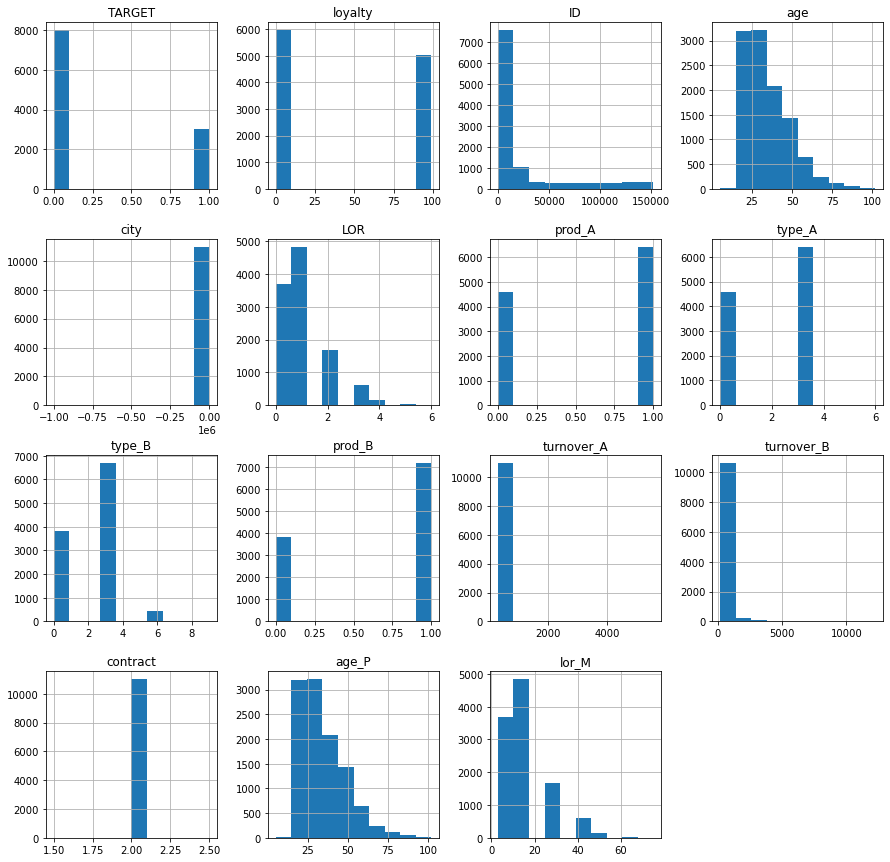

In [13]:
#plot the histograms for all the attributes and see how widely the data is distributed
data1.hist(bins = 10,figsize=(15,15));

In [14]:
#for col in list(data1.columns):
#    data1.col.hist()

In [15]:
#data1.age_p.hist()

In [16]:
#list(data1.columns)

In [17]:
numeric_cols = data1.select_dtypes(include=['int64','float64']).columns

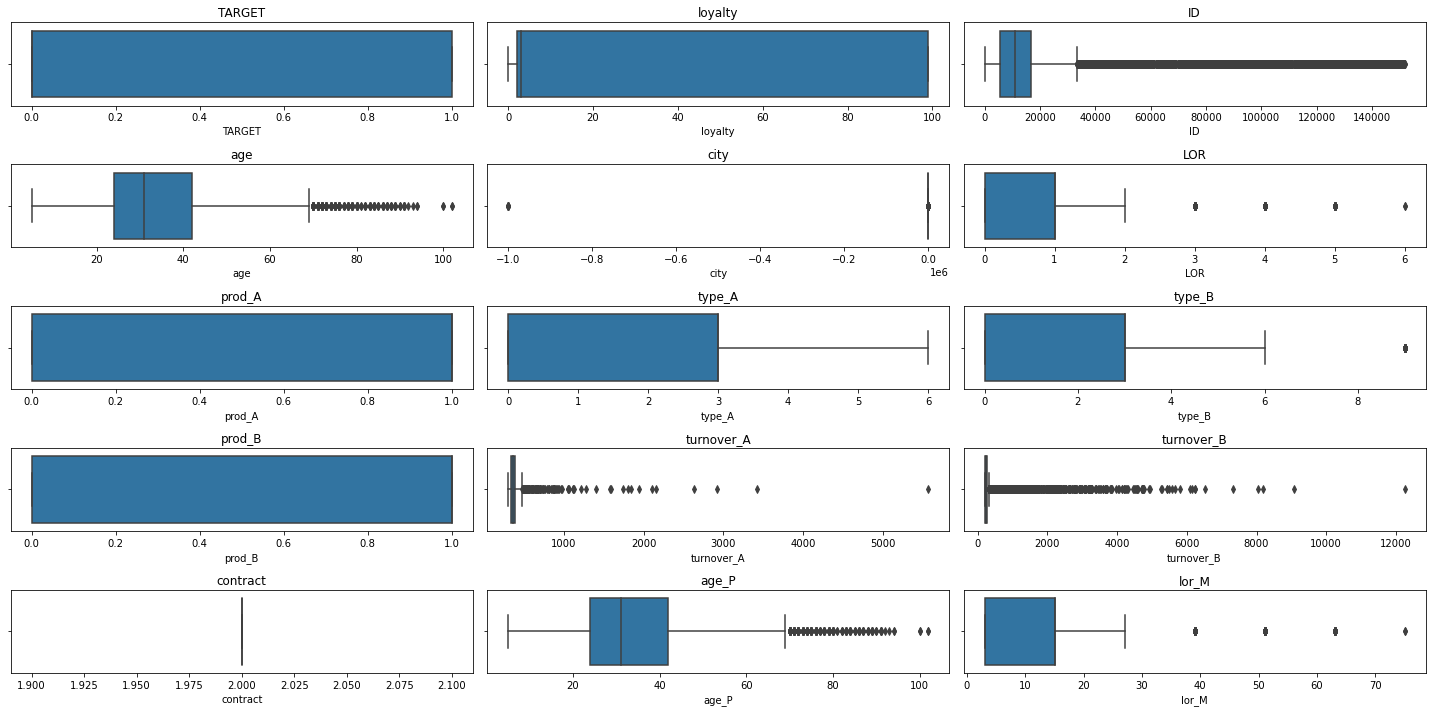

In [18]:
plt.figure(figsize=(20,10))
for i,col in enumerate(numeric_cols):
    plt.subplot(math.ceil(len(numeric_cols)/3),3,i+1)
    sns.boxplot(data1[col])
    plt.tight_layout()
    plt.title(col)

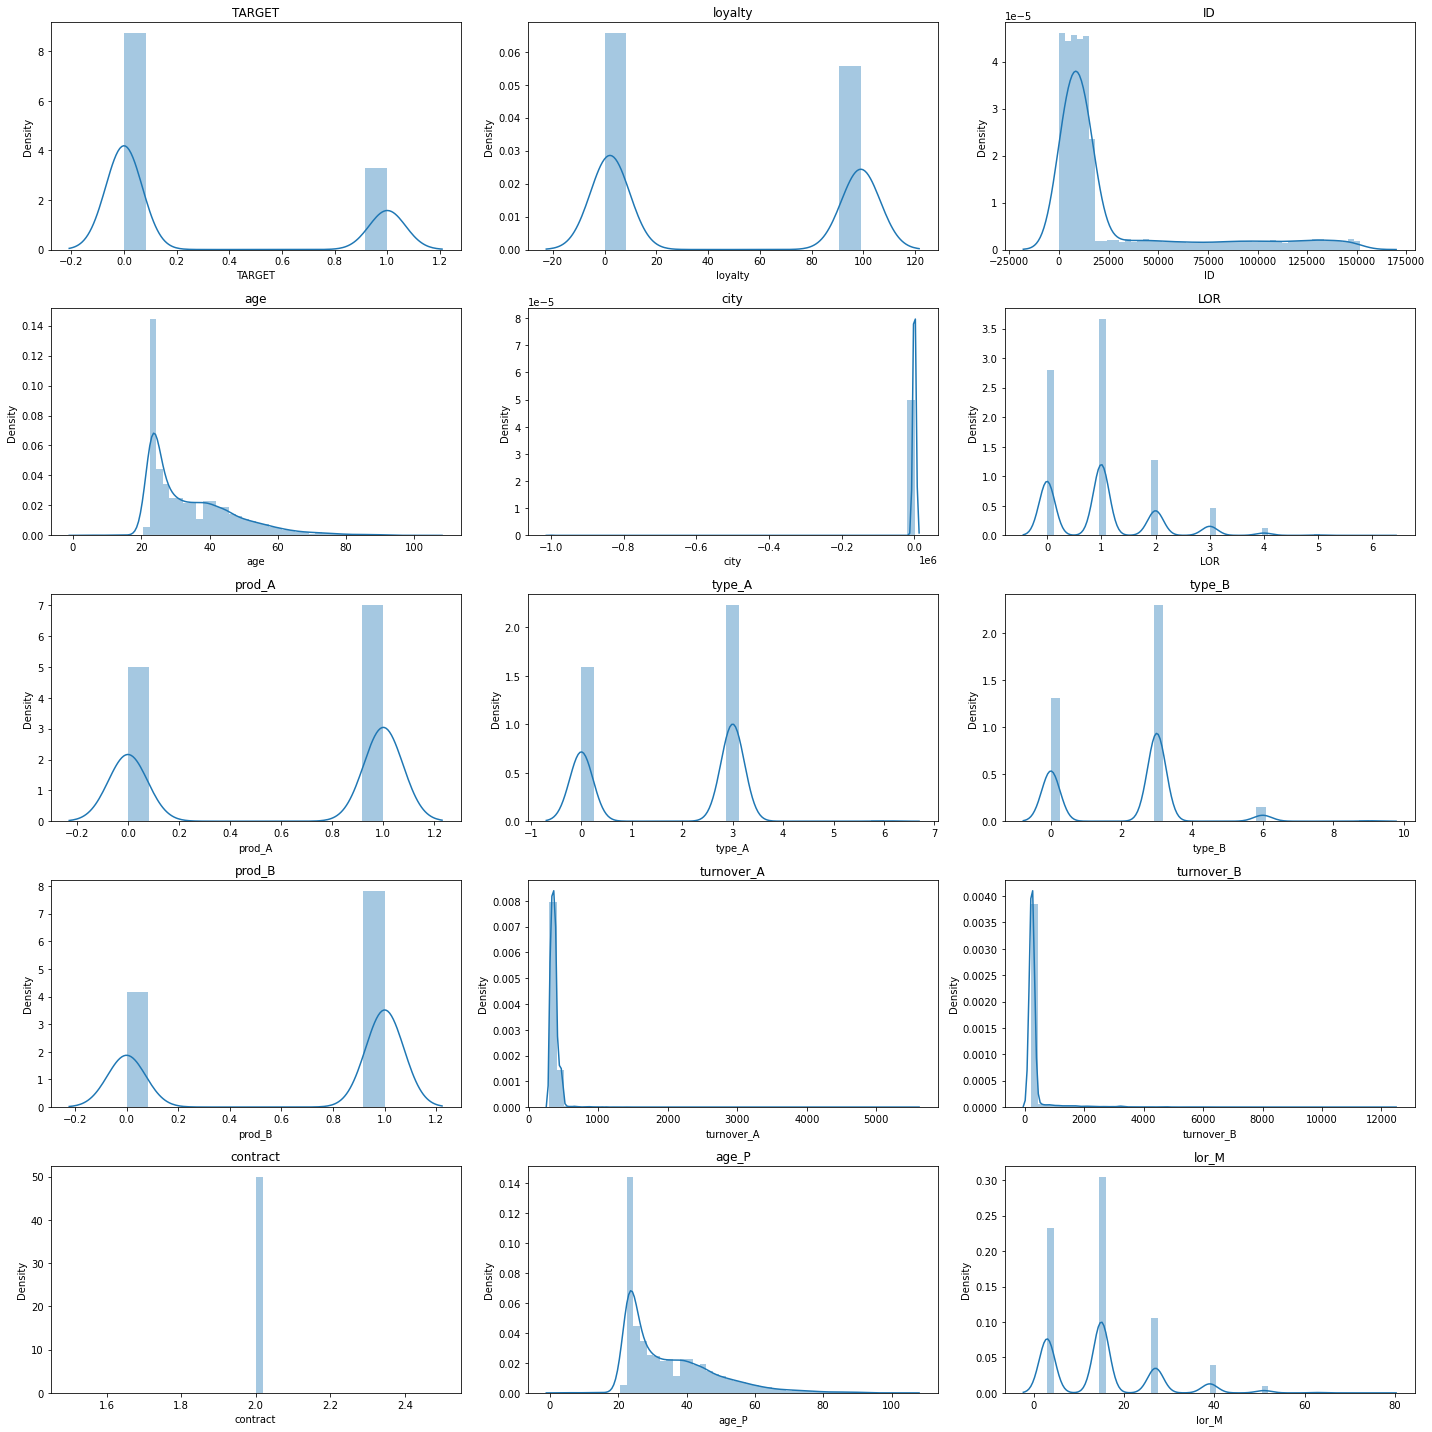

In [19]:
#This functions plots the estimated probability density function of the data

plt.figure(figsize=(20,20))
for i,col in enumerate(numeric_cols):
    plt.subplot(math.ceil(len(numeric_cols)/3),3,i+1)
    sns.distplot(data1[col],label=col,kde=True)
    plt.tight_layout()
    plt.title(col)

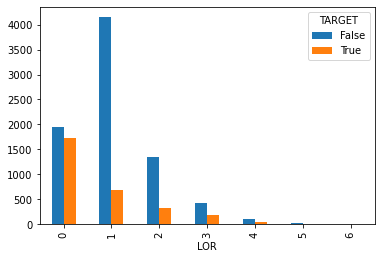

In [20]:
pd.crosstab(data1.LOR ,data1.TARGET.astype(bool)).plot(kind='bar');

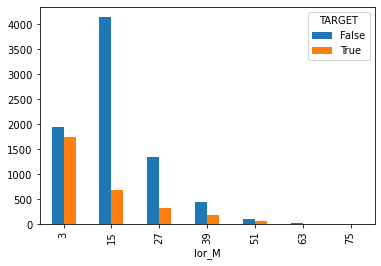

In [21]:
pd.crosstab(data1.lor_M ,data1.TARGET.astype(bool)).plot(kind='bar');

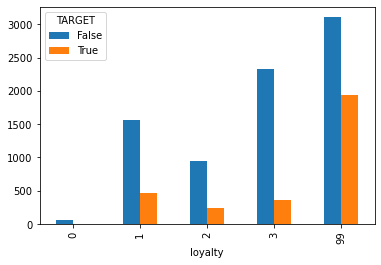

In [22]:
pd.crosstab(data1.loyalty ,data1.TARGET.astype(bool)).plot(kind='bar');

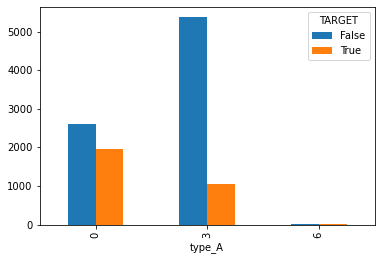

In [23]:
pd.crosstab(data1.type_A ,data1.TARGET.astype(bool)).plot(kind='bar');

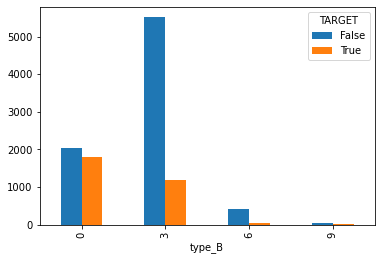

In [24]:
pd.crosstab(data1.type_B ,data1.TARGET.astype(bool)).plot(kind='bar');

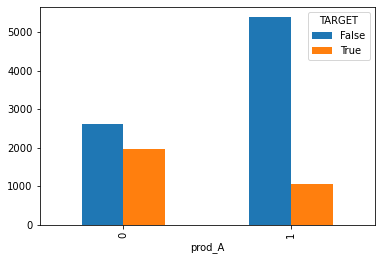

In [25]:
pd.crosstab(data1.prod_A ,data1.TARGET.astype(bool)).plot(kind='bar');

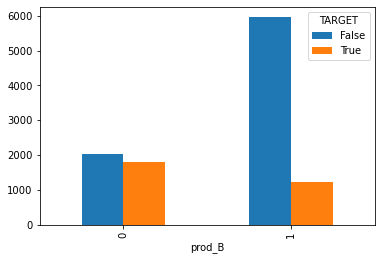

In [26]:
pd.crosstab(data1.prod_B ,data1.TARGET.astype(bool)).plot(kind='bar');

In [27]:
data1['TARGET'].value_counts()

0    8000
1    3008
Name: TARGET, dtype: int64

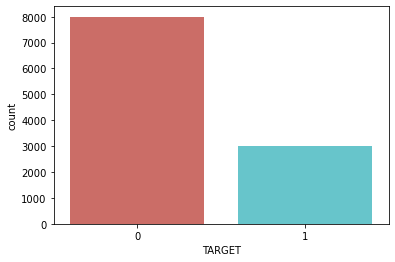

In [28]:
sns.countplot(x='TARGET',data = data1, palette='hls')
plt.show()

In [29]:
data1['TARGET'].values.sum()/data1['TARGET'].count()

0.27325581395348836

In [30]:
1-(data1['TARGET'].values.sum()/data1['TARGET'].count())

0.7267441860465116

In [31]:
data1.groupby('TARGET').mean()

,loyalty,ID,age,city,LOR,prod_A,type_A,type_B,prod_B,turnover_A,turnover_B,contract,age_P,lor_M
TARGET,,,,,,,,,,,,,,
0,39.791625,8366.446750,33.027125,-747.257125,1.081375,0.673000,2.025000,2.411625,0.74475,360.368141,371.263176,2.0,33.027125,15.976500
1,64.464428,76643.175864,39.680519,-662.669548,0.720080,0.348737,1.053191,1.263630,0.40625,404.152250,271.932769,2.0,39.680519,11.640957


- This is imbalanced data with ratio of 73:27, 73% with no additional insurance purchase and 27% with additional purchase

- The average age who purchased the additional insurance is more than that of the customers who did not purchase

- The length of relationship for the additional insurance purchaser is less than that of the other

- Though few customers with additional purchases bought type_A, the turnover for it is more

In [32]:
data1.corr()

,TARGET,loyalty,ID,age,city,LOR,prod_A,type_A,type_B,prod_B,turnover_A,turnover_B,contract,age_P,lor_M
TARGET,1.000000,0.227685,0.788753,0.227510,0.001399,-0.171396,-0.293210,-0.290637,-0.306086,-0.316734,0.201813,-0.084418,NaN,0.227510,-0.171396
loyalty,0.227685,1.000000,0.186083,-0.069195,0.004617,-0.644169,-0.591053,-0.590382,-0.701428,-0.728864,-0.007931,-0.189364,NaN,-0.069195,-0.644169
ID,0.788753,0.186083,1.000000,0.181917,-0.006669,-0.143621,-0.246825,-0.245314,-0.254317,-0.264987,0.163942,-0.062976,NaN,0.181917,-0.143621
age,0.227510,-0.069195,0.181917,1.000000,-0.000549,0.120313,-0.140526,-0.139524,0.059915,-0.038487,0.130944,0.293546,NaN,1.000000,0.120313
city,0.001399,0.004617,-0.006669,-0.000549,1.000000,0.017452,0.011445,0.011470,0.015693,0.015692,-0.001476,0.005807,NaN,-0.000549,0.017452
LOR,-0.171396,-0.644169,-0.143621,0.120313,0.017452,1.000000,0.558389,0.557240,0.758476,0.734568,0.024052,0.164561,NaN,0.120313,1.000000
prod_A,-0.293210,-0.591053,-0.246825,-0.140526,0.011445,0.558389,1.000000,0.995772,0.795506,0.865835,0.000495,-0.029556,NaN,-0.140526,0.558389
type_A,-0.290637,-0.590382,-0.245314,-0.139524,0.011470,0.557240,0.995772,1.000000,0.799470,0.862173,0.001322,-0.029981,NaN,-0.139524,0.557240
type_B,-0.306086,-0.701428,-0.254317,0.059915,0.015693,0.758476,0.795506,0.799470,1.000000,0.916522,-0.011372,0.315109,NaN,0.059915,0.758476
prod_B,-0.316734,-0.728864,-0.264987,-0.038487,0.015692,0.734568,0.865835,0.862173,0.916522,1.000000,-0.016728,0.148441,NaN,-0.038487,0.734568


<AxesSubplot:>

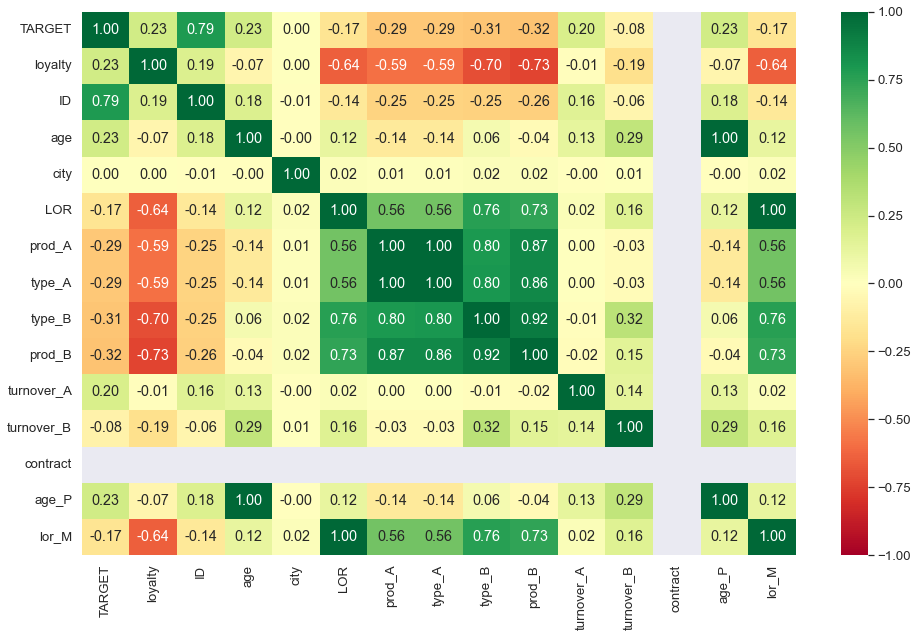

In [33]:
plt.figure(figsize=(16,10))
sns.set(font_scale=1.2)
sns.heatmap(data1.corr(),cmap='RdYlGn',vmin = -1, vmax = 1,annot=True,fmt=".2f")

#### Correlation between the TARGET and explanatory variables:
- TARGET shows strong positive correlation with the ID. It is obvious that increase in number of the ID's i.e. number of customers, the TARGET will increase

#### Correlation between explanatory variables:
- age_p is directly correlated with age (correlation = 1)
- LOR is directly correlated with lor_M (correlation = 1)
- prod_A is directly correlated with type_A (correlation = 1)
- prod_B is strongly correlated with type_B (correlation = 0.92)
- Negative correlation between Loyalty and LOR, prod_A, prod_B

### Data Preparation and dimensionality reduction:

In [34]:
data

,TARGET,loyalty,ID,age,city,LOR,prod_A,type_A,type_B,prod_B,turnover_A,turnover_B,contract,age_P,lor_M
0,1,99,77,66,2,0,0,0,0,0,333.561114,264.721010,2,66,3
1,1,1,159,45,2,3,1,3,3,1,394.735699,284.904978,2,45,39
2,1,1,220,42,2,2,1,3,6,1,342.180990,1175.589721,2,42,27
3,1,99,303,31,2,0,0,0,0,0,453.757916,242.341754,2,31,3
4,1,99,306,62,2,0,0,0,0,0,384.577469,287.008370,2,62,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14011,1,99,151601,30,2,0,0,0,0,0,386.434278,284.309508,2,30,3
14012,1,1,151634,27,2,2,1,3,3,1,376.842591,266.993794,2,27,27
14013,1,99,151679,26,2,0,0,0,0,0,434.805703,284.629361,2,26,3
14014,1,1,151804,75,2,1,1,3,3,1,366.273857,270.573265,2,75,15


In [35]:
data1

,TARGET,loyalty,ID,age,city,LOR,prod_A,type_A,type_B,prod_B,turnover_A,turnover_B,contract,age_P,lor_M
0,1,99,77,66,2,0,0,0,0,0,333.561114,264.721010,2,66,3
1,1,1,159,45,2,3,1,3,3,1,394.735699,284.904978,2,45,39
2,1,1,220,42,2,2,1,3,6,1,342.180990,1175.589721,2,42,27
3,1,99,303,31,2,0,0,0,0,0,453.757916,242.341754,2,31,3
4,1,99,306,62,2,0,0,0,0,0,384.577469,287.008370,2,62,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11003,0,1,16793,33,2,2,1,3,3,1,302.380331,229.457986,2,33,27
11004,0,99,16794,23,2,0,0,0,0,0,316.268616,228.518505,2,23,3
11005,0,1,16798,23,2,2,1,3,3,1,385.871241,236.665515,2,23,27
11006,0,99,16800,32,2,1,1,3,3,1,317.578868,226.899614,2,32,15


In [36]:
data2 = data1.drop(['age_P','lor_M','city','type_A','type_B','contract','ID'],axis =1)

In [37]:
data2

,TARGET,loyalty,age,LOR,prod_A,prod_B,turnover_A,turnover_B
0,1,99,66,0,0,0,333.561114,264.721010
1,1,1,45,3,1,1,394.735699,284.904978
2,1,1,42,2,1,1,342.180990,1175.589721
3,1,99,31,0,0,0,453.757916,242.341754
4,1,99,62,0,0,0,384.577469,287.008370
...,...,...,...,...,...,...,...,...
11003,0,1,33,2,1,1,302.380331,229.457986
11004,0,99,23,0,0,0,316.268616,228.518505
11005,0,1,23,2,1,1,385.871241,236.665515
11006,0,99,32,1,1,1,317.578868,226.899614


<AxesSubplot:>

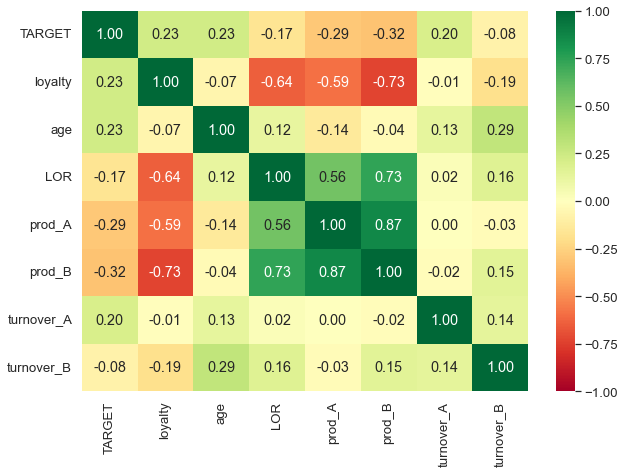

In [38]:
plt.figure(figsize=(10,7))
sns.set(font_scale=1.2)
sns.heatmap(data2.corr(),cmap='RdYlGn',vmin = -1, vmax = 1,annot=True,fmt=".2f")

In [39]:
data2['loyalty'].value_counts()[99]

5048

In [40]:
dummies_1 = pd.get_dummies(data2['loyalty']).rename(columns = lambda x: 'loyalty_'+str(x))
#dummies_2 = pd.get_dummies(data2['LOR']).rename(columns = lambda x: 'LOR_'+str(x))
data3 = pd.concat([data2,dummies_1],axis = 1)
data3 = data3.drop(['loyalty'],axis = 1)

In [41]:
data3

,TARGET,age,LOR,prod_A,prod_B,turnover_A,turnover_B,loyalty_0,loyalty_1,loyalty_2,loyalty_3,loyalty_99
0,1,66,0,0,0,333.561114,264.721010,0,0,0,0,1
1,1,45,3,1,1,394.735699,284.904978,0,1,0,0,0
2,1,42,2,1,1,342.180990,1175.589721,0,1,0,0,0
3,1,31,0,0,0,453.757916,242.341754,0,0,0,0,1
4,1,62,0,0,0,384.577469,287.008370,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
11003,0,33,2,1,1,302.380331,229.457986,0,1,0,0,0
11004,0,23,0,0,0,316.268616,228.518505,0,0,0,0,1
11005,0,23,2,1,1,385.871241,236.665515,0,1,0,0,0
11006,0,32,1,1,1,317.578868,226.899614,0,0,0,0,1


### Logistic Regression Model:

We know that, this is an imbalanced data with ratio of 73:27, 73% with no additional insurance purchase and 27% with additional purchase. 72.67% is the null error rate and the accuracy predicting the number of customers purchasing additional insurance

In our model, the accuracy should be more than 72.67% and other metrics should be considered, especially, precision

Find three models below:
- Model 1: As is data with no scaling and no dummy variables
- Model 2: Data with normalizing the variables
- Model 3: As is data with dummy variables created for categorical variables

#### Model 1:
__As is data with no scaling and no dummy variables__

In [42]:
X1 = data2.loc[:,data2.columns!='TARGET']
y1 = data2['TARGET']

In [43]:
model = LogisticRegression()
model1 = model.fit(X1,y1)

In [44]:
# examine the coefficients
pd.DataFrame(zip(X1.columns, np.transpose(model1.coef_)))

,0,1
0,loyalty,[0.0015853720403969076]
1,age,[0.04178289022301359]
2,LOR,[0.15289654900859156]
3,prod_A,[-0.44048273143550903]
4,prod_B,[-1.0682781255210958]
5,turnover_A,[0.010404511846889524]
6,turnover_B,[-0.0020212357298028754]


In [45]:
logit_model = sm.Logit(y1,X1)
res = logit_model.fit()
res.summary2()

Optimization terminated successfully.
         Current function value: 0.509794
         Iterations 8


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.131     
Dependent Variable: TARGET           AIC:              11237.6213
Date:               2023-03-05 22:02 BIC:              11288.7659
No. Observations:   11008            Log-Likelihood:   -5611.8   
Df Model:           6                LL-Null:          -6455.9   
Df Residuals:       11001            LLR p-value:      0.0000    
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     8.0000                                       
------------------------------------------------------------------
              Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
------------------------------------------------------------------
loyalty      -0.0121    0.0008  -16.0500  0.0000  -0.0135  -0.0106
age           0.0231    0.0017   13.4904  0.0000   0.0198   0.0265
LOR           0.1505    0.0402    3.7444  0.0002   0.0717   0.2292
prod_A       -0.5864    0.1118   -5.2469  0.0000  -0.8055  -0.3674
prod_B       -2.1683    0.1482  -14.6340  0.0000  -2.4587  -1.8779
turnover_A    0.0022    0.0002    9.4329  0.0000   0.0017   0.0027
turnover_B   -0.0018    0.0002  -10.1360  0.0000  -0.0022  -0.0015
=================================================================

"""

In [46]:
model1.score(X1,y1)

0.7974200581395349

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X1,y1,test_size = 0.30, random_state = 10)

In [48]:
X_train.head()

,loyalty,age,LOR,prod_A,prod_B,turnover_A,turnover_B
8108,99,23,0,0,0,313.778287,209.736526
4697,3,25,1,1,1,365.622827,236.949813
9311,1,38,2,1,1,471.725440,325.974174
3701,99,26,0,0,0,350.914490,248.894977
7216,99,23,0,0,0,309.267684,221.333341


In [49]:
y_train.head()

8108    0
4697    0
9311    0
3701    0
7216    0
Name: TARGET, dtype: int64

In [50]:
X_test.head()

,loyalty,age,LOR,prod_A,prod_B,turnover_A,turnover_B
10203,3,25,1,1,1,388.808573,218.547654
5954,99,59,0,0,0,320.060319,211.491546
8625,99,26,0,0,0,350.381145,202.637693
445,3,30,1,1,1,392.653349,214.627792
2467,1,29,2,1,1,395.438033,238.731309


In [51]:
y_test.head()

10203    0
5954     0
8625     0
445      1
2467     1
Name: TARGET, dtype: int64

In [52]:
model1 = LogisticRegression()
model1.fit(X_train, y_train)

LogisticRegression()

In [53]:
predict1 = model1.predict(X_test)
predict1

array([0, 1, 0, ..., 0, 0, 0])

In [54]:
prob1 = model1.predict_proba(X_test)
prob1

array([[0.87871121, 0.12128879],
       [0.42752672, 0.57247328],
       [0.67076065, 0.32923935],
       ...,
       [0.51549365, 0.48450635],
       [0.91311058, 0.08688942],
       [0.67970934, 0.32029066]])

In [55]:
print("accuracy score :",metrics.accuracy_score(y_test,predict1))
print("precision score :",metrics.precision_score(y_test,predict1))
print("recall score :",metrics.recall_score(y_test,predict1))
print("f1 score :",metrics.f1_score(y_test,predict1))
#print("roc_auc score :",metrics.roc_auc_score(y_test,prob1[:,1]))

accuracy score : 0.7929155313351499
precision score : 0.7167300380228137
recall score : 0.4133771929824561
f1 score : 0.5243393602225312


In [56]:
print("confusion matrix :\n",metrics.confusion_matrix(y_test,predict1),"\n")
print("classification report :\n",metrics.classification_report(y_test,predict1))

confusion matrix :
 [[2242  149]
 [ 535  377]] 

classification report :
               precision    recall  f1-score   support

           0       0.81      0.94      0.87      2391
           1       0.72      0.41      0.52       912

    accuracy                           0.79      3303
   macro avg       0.76      0.68      0.70      3303
weighted avg       0.78      0.79      0.77      3303



In [57]:
score1 = cross_val_score(model1,X1,y1,scoring = 'precision',cv=10)
print(score1,"\n")
print(score1.mean())

[0.69148936 0.67934783 0.73417722 0.68367347 0.7283237  0.69680851
 0.71590909 0.73762376 0.76836158 0.70212766] 

0.7137842177207676


#### Model 2:
__Data with normalizing the variables__

In [58]:
data2

,TARGET,loyalty,age,LOR,prod_A,prod_B,turnover_A,turnover_B
0,1,99,66,0,0,0,333.561114,264.721010
1,1,1,45,3,1,1,394.735699,284.904978
2,1,1,42,2,1,1,342.180990,1175.589721
3,1,99,31,0,0,0,453.757916,242.341754
4,1,99,62,0,0,0,384.577469,287.008370
...,...,...,...,...,...,...,...,...
11003,0,1,33,2,1,1,302.380331,229.457986
11004,0,99,23,0,0,0,316.268616,228.518505
11005,0,1,23,2,1,1,385.871241,236.665515
11006,0,99,32,1,1,1,317.578868,226.899614


In [59]:
X2 = X1.copy()
y2 = y1.copy()

In [60]:
scaler = MinMaxScaler()
X2 = scaler.fit_transform(X2)

In [61]:
X2

array([[1.        , 0.62886598, 0.        , ..., 0.        , 0.00635171,
        0.00603445],
       [0.01010101, 0.41237113, 0.5       , ..., 1.        , 0.01796269,
        0.00770848],
       [0.01010101, 0.3814433 , 0.33333333, ..., 1.        , 0.00798777,
        0.08158057],
       ...,
       [0.01010101, 0.18556701, 0.33333333, ..., 1.        , 0.01628021,
        0.00370757],
       [1.        , 0.27835052, 0.16666667, ..., 1.        , 0.00331828,
        0.0028976 ],
       [0.02020202, 0.18556701, 0.5       , ..., 1.        , 0.00928883,
        0.00113282]])

In [62]:
X2 = pd.DataFrame(X2, columns = X1.columns)

In [63]:
X2

,loyalty,age,LOR,prod_A,prod_B,turnover_A,turnover_B
0,1.000000,0.628866,0.000000,0.0,0.0,0.006352,0.006034
1,0.010101,0.412371,0.500000,1.0,1.0,0.017963,0.007708
2,0.010101,0.381443,0.333333,1.0,1.0,0.007988,0.081581
3,1.000000,0.268041,0.000000,0.0,0.0,0.029165,0.004178
4,1.000000,0.587629,0.000000,0.0,0.0,0.016035,0.007883
...,...,...,...,...,...,...,...
11003,0.010101,0.288660,0.333333,1.0,1.0,0.000434,0.003110
11004,1.000000,0.185567,0.000000,0.0,0.0,0.003070,0.003032
11005,0.010101,0.185567,0.333333,1.0,1.0,0.016280,0.003708
11006,1.000000,0.278351,0.166667,1.0,1.0,0.003318,0.002898


In [64]:
model = LogisticRegression()
model2 = model.fit(X2,y2)

In [65]:
# examine the coefficients
pd.DataFrame(zip(X1.columns, np.transpose(model2.coef_)))

,0,1
0,loyalty,[0.2648981530185828]
1,age,[3.904631494844483]
2,LOR,[1.4992350370154062]
3,prod_A,[-0.19194829839014538]
4,prod_B,[-1.4260250278467845]
5,turnover_A,[10.287804678665161]
6,turnover_B,[-6.582244437705513]


In [66]:
logit_model2 = sm.Logit(y2,X2)
res2 = logit_model2.fit()
res2.summary2()

Optimization terminated successfully.
         Current function value: 0.489479
         Iterations 8


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.165     
Dependent Variable: TARGET           AIC:              10790.3701
Date:               2023-03-05 22:02 BIC:              10841.5148
No. Observations:   11008            Log-Likelihood:   -5388.2   
Df Model:           6                LL-Null:          -6455.9   
Df Residuals:       11001            LLR p-value:      0.0000    
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     8.0000                                       
-----------------------------------------------------------------
               Coef.   Std.Err.    z     P>|z|   [0.025   0.975] 
-----------------------------------------------------------------
loyalty        -1.1967   0.0592 -20.2284 0.0000  -1.3127  -1.0808
age             2.0649   0.1659  12.4497 0.0000   1.7399   2.3900
LOR             0.6103   0.2475   2.4664 0.0136   0.1253   1.0953
prod_A         -0.7340   0.1133  -6.4759 0.0000  -0.9561  -0.5118
prod_B         -1.9907   0.1462 -13.6141 0.0000  -2.2772  -1.7041
turnover_A     46.2501   2.2885  20.2097 0.0000  41.7647  50.7355
turnover_B    -23.0096   2.1147 -10.8807 0.0000 -27.1543 -18.8648
=================================================================

"""

In [67]:
model2.score(X2,y2)

0.7662609011627907

In [68]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2,y2,test_size = 0.30, random_state = 10)

In [69]:
X_train2.head()

,loyalty,age,LOR,prod_A,prod_B,turnover_A,turnover_B
8108,1.000000,0.185567,0.000000,0.0,0.0,0.002597,0.001474
4697,0.030303,0.206186,0.166667,1.0,1.0,0.012437,0.003731
9311,0.010101,0.340206,0.333333,1.0,1.0,0.032575,0.011115
3701,1.000000,0.216495,0.000000,0.0,0.0,0.009645,0.004722
7216,1.000000,0.185567,0.000000,0.0,0.0,0.001741,0.002436


In [70]:
y_train2.head()

8108    0
4697    0
9311    0
3701    0
7216    0
Name: TARGET, dtype: int64

In [71]:
X_test2.head()

,loyalty,age,LOR,prod_A,prod_B,turnover_A,turnover_B
10203,0.030303,0.206186,0.166667,1.0,1.0,0.016838,0.002205
5954,1.000000,0.556701,0.000000,0.0,0.0,0.003789,0.001620
8625,1.000000,0.216495,0.000000,0.0,0.0,0.009544,0.000885
445,0.030303,0.257732,0.166667,1.0,1.0,0.017567,0.001880
2467,0.010101,0.247423,0.333333,1.0,1.0,0.018096,0.003879


In [72]:
y_test2.head()

10203    0
5954     0
8625     0
445      1
2467     1
Name: TARGET, dtype: int64

In [73]:
model2 = LogisticRegression()
model2.fit(X_train2, y_train2)

LogisticRegression()

In [74]:
predict2 = model2.predict(X_test2)
predict2

array([0, 1, 0, ..., 0, 0, 0])

In [75]:
prob2 = model2.predict_proba(X_test2)
prob2

array([[0.89758049, 0.10241951],
       [0.32436164, 0.67563836],
       [0.63516172, 0.36483828],
       ...,
       [0.52109958, 0.47890042],
       [0.89979605, 0.10020395],
       [0.62953314, 0.37046686]])

In [76]:
print("accuracy score :",metrics.accuracy_score(y_test2,predict2))
print("precision score :",metrics.precision_score(y_test2,predict2))
print("recall score :",metrics.recall_score(y_test2,predict2))
print("f1 score :",metrics.f1_score(y_test2,predict2))
#print("roc_auc score :",metrics.roc_auc_score(y_test,prob1[:,1]))

accuracy score : 0.7629427792915532
precision score : 0.6482758620689655
recall score : 0.3092105263157895
f1 score : 0.4187082405345212


In [77]:
print("confusion matrix :\n",metrics.confusion_matrix(y_test2,predict2),"\n")
print("classification report :\n",metrics.classification_report(y_test2,predict2))

confusion matrix :
 [[2238  153]
 [ 630  282]] 

classification report :
               precision    recall  f1-score   support

           0       0.78      0.94      0.85      2391
           1       0.65      0.31      0.42       912

    accuracy                           0.76      3303
   macro avg       0.71      0.62      0.63      3303
weighted avg       0.74      0.76      0.73      3303



In [78]:
score2 = cross_val_score(model2,X2,y2,scoring = 'precision',cv=10)
print(score2,"\n")
print(score2.mean())

[0.63333333 0.60810811 0.62711864 0.63354037 0.63909774 0.61486486
 0.68421053 0.66459627 0.71830986 0.62025316] 

0.6443432890725419


#### Model 3:
__As is data with dummy variables created for categorical variables__

In [79]:
data3

,TARGET,age,LOR,prod_A,prod_B,turnover_A,turnover_B,loyalty_0,loyalty_1,loyalty_2,loyalty_3,loyalty_99
0,1,66,0,0,0,333.561114,264.721010,0,0,0,0,1
1,1,45,3,1,1,394.735699,284.904978,0,1,0,0,0
2,1,42,2,1,1,342.180990,1175.589721,0,1,0,0,0
3,1,31,0,0,0,453.757916,242.341754,0,0,0,0,1
4,1,62,0,0,0,384.577469,287.008370,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
11003,0,33,2,1,1,302.380331,229.457986,0,1,0,0,0
11004,0,23,0,0,0,316.268616,228.518505,0,0,0,0,1
11005,0,23,2,1,1,385.871241,236.665515,0,1,0,0,0
11006,0,32,1,1,1,317.578868,226.899614,0,0,0,0,1


In [80]:
data3.columns

Index(['TARGET', 'age', 'LOR', 'prod_A', 'prod_B', 'turnover_A', 'turnover_B',
       'loyalty_0', 'loyalty_1', 'loyalty_2', 'loyalty_3', 'loyalty_99'],
      dtype='object')

In [81]:
X3 = data3.loc[:,data3.columns!='TARGET']
y3 = data3['TARGET']

In [82]:
model = LogisticRegression()
model3 = model.fit(X3,y3)

In [83]:
# examine the coefficients
pd.DataFrame(zip(X3.columns, np.transpose(model3.coef_)))

,0,1
0,age,[0.049402458721773804]
1,LOR,[0.07829637166795933]
2,prod_A,[-0.5832913850774887]
3,prod_B,[-1.0785585080962015]
4,turnover_A,[0.007817269137512505]
5,turnover_B,[-0.00221843615431771]
6,loyalty_0,[-0.20766576162890588]
7,loyalty_1,[-1.09376579980577]
8,loyalty_2,[-0.674952117106981]
9,loyalty_3,[-0.5977929584172235]


In [84]:
logit_model3 = sm.Logit(y3,X3)
res3 = logit_model3.fit()
res3.summary2()

         Current function value: 0.468443
         Iterations: 35


/Users/aishu/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary2.Summary'>
"""
                             Results: Logit
========================================================================
Model:                 Logit              Pseudo R-squared:   0.201     
Dependent Variable:    TARGET             AIC:                10335.2509
Date:                  2023-03-05 22:02   BIC:                10415.6211
No. Observations:      11008              Log-Likelihood:     -5156.6   
Df Model:              10                 LL-Null:            -6455.9   
Df Residuals:          10997              LLR p-value:        0.0000    
Converged:             0.0000             Scale:              1.0000    
No. Iterations:        35.0000                                          
------------------------------------------------------------------------
            Coef.     Std.Err.     z     P>|z|     [0.025       0.975]  
------------------------------------------------------------------------
age          0.0421      0.0020  20.9626 0.0000       0.0381      0.0460
LOR          0.2122      0.0469   4.5226 0.0000       0.1203      0.3042
prod_A      -0.6411      0.1177  -5.4449 0.0000      -0.8719     -0.4103
prod_B      -0.9153      0.1592  -5.7491 0.0000      -1.2273     -0.6032
turnover_A   0.0110      0.0005  23.0557 0.0000       0.0100      0.0119
turnover_B  -0.0020      0.0002 -10.2665 0.0000      -0.0024     -0.0016
loyalty_0  -30.3787 116370.5031  -0.0003 0.9998 -228112.3737 228051.6163
loyalty_1   -5.5877      0.2220 -25.1745 0.0000      -6.0228     -5.1527
loyalty_2   -5.4145      0.2213 -24.4698 0.0000      -5.8482     -4.9808
loyalty_3   -5.4367      0.2064 -26.3389 0.0000      -5.8412     -5.0321
loyalty_99  -5.2501      0.1877 -27.9708 0.0000      -5.6180     -4.8822
========================================================================

"""

In [85]:
X3 = X3.loc[:,X3.columns!='loyalty_0']
y3 = data3['TARGET']

In [86]:
X3.columns

Index(['age', 'LOR', 'prod_A', 'prod_B', 'turnover_A', 'turnover_B',
       'loyalty_1', 'loyalty_2', 'loyalty_3', 'loyalty_99'],
      dtype='object')

In [87]:
model = LogisticRegression()
model3 = model.fit(X3,y3)

In [88]:
model3.score(X3,y3)

0.7976925872093024

In [89]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3,y3,test_size = 0.30, random_state = 10)

In [90]:
X_train3.head()

,age,LOR,prod_A,prod_B,turnover_A,turnover_B,loyalty_1,loyalty_2,loyalty_3,loyalty_99
8108,23,0,0,0,313.778287,209.736526,0,0,0,1
4697,25,1,1,1,365.622827,236.949813,0,0,1,0
9311,38,2,1,1,471.725440,325.974174,1,0,0,0
3701,26,0,0,0,350.914490,248.894977,0,0,0,1
7216,23,0,0,0,309.267684,221.333341,0,0,0,1


In [91]:
y_train3.head()

8108    0
4697    0
9311    0
3701    0
7216    0
Name: TARGET, dtype: int64

In [92]:
X_test3.head()

,age,LOR,prod_A,prod_B,turnover_A,turnover_B,loyalty_1,loyalty_2,loyalty_3,loyalty_99
10203,25,1,1,1,388.808573,218.547654,0,0,1,0
5954,59,0,0,0,320.060319,211.491546,0,0,0,1
8625,26,0,0,0,350.381145,202.637693,0,0,0,1
445,30,1,1,1,392.653349,214.627792,0,0,1,0
2467,29,2,1,1,395.438033,238.731309,1,0,0,0


In [93]:
y_test3.head()

10203    0
5954     0
8625     0
445      1
2467     1
Name: TARGET, dtype: int64

In [94]:
model3 = LogisticRegression()
model3.fit(X_train3, y_train3)

LogisticRegression()

In [95]:
predict3 = model3.predict(X_test3)
predict3

array([0, 1, 0, ..., 0, 0, 0])

In [96]:
prob3 = model3.predict_proba(X_test3)
prob3

array([[0.86659422, 0.13340578],
       [0.42128886, 0.57871114],
       [0.66689314, 0.33310686],
       ...,
       [0.50858421, 0.49141579],
       [0.90958824, 0.09041176],
       [0.68219687, 0.31780313]])

In [97]:
print("accuracy score :",metrics.accuracy_score(y_test3,predict3))
print("precision score :",metrics.precision_score(y_test3,predict3))
print("recall score :",metrics.recall_score(y_test3,predict3))
print("f1 score :",metrics.f1_score(y_test3,predict3))
#print("roc_auc score :",metrics.roc_auc_score(y_test,prob1[:,1]))

accuracy score : 0.7956403269754768
precision score : 0.6945812807881774
recall score : 0.46381578947368424
f1 score : 0.5562130177514794


In [98]:
print("confusion matrix :\n",metrics.confusion_matrix(y_test3,predict3),"\n")
print("classification report :\n",metrics.classification_report(y_test3,predict3))

confusion matrix :
 [[2205  186]
 [ 489  423]] 

classification report :
               precision    recall  f1-score   support

           0       0.82      0.92      0.87      2391
           1       0.69      0.46      0.56       912

    accuracy                           0.80      3303
   macro avg       0.76      0.69      0.71      3303
weighted avg       0.78      0.80      0.78      3303



In [99]:
score3 = cross_val_score(model3,X3,y3,scoring = 'precision',cv=10)
print(score3,"\n")
print(score3.mean())

[0.69892473 0.66489362 0.72222222 0.70114943 0.7183908  0.70621469
 0.68852459 0.73737374 0.73015873 0.68717949] 

0.7055032034452778


### Conclusion:

- __Scores for model 1__

In [100]:
print("accuracy score :",metrics.accuracy_score(y_test,predict1))
print("precision score :",metrics.precision_score(y_test,predict1))
print("recall score :",metrics.recall_score(y_test,predict1))
print("f1 score :",metrics.f1_score(y_test,predict1))

accuracy score : 0.7929155313351499
precision score : 0.7167300380228137
recall score : 0.4133771929824561
f1 score : 0.5243393602225312


- __Scores for model 2__

In [101]:
print("accuracy score :",metrics.accuracy_score(y_test2,predict2))
print("precision score :",metrics.precision_score(y_test2,predict2))
print("recall score :",metrics.recall_score(y_test2,predict2))
print("f1 score :",metrics.f1_score(y_test2,predict2))

accuracy score : 0.7629427792915532
precision score : 0.6482758620689655
recall score : 0.3092105263157895
f1 score : 0.4187082405345212


- __Scores for model 3__

In [102]:
print("accuracy score :",metrics.accuracy_score(y_test3,predict3))
print("precision score :",metrics.precision_score(y_test3,predict3))
print("recall score :",metrics.recall_score(y_test3,predict3))
print("f1 score :",metrics.f1_score(y_test3,predict3))

accuracy score : 0.7956403269754768
precision score : 0.6945812807881774
recall score : 0.46381578947368424
f1 score : 0.5562130177514794


- __Model 1 consists as is data with its dimensionality reduced, Model 3 consists same variables as Model 1 but Dummy variables created for all the categorical variables__
- __The accuracy is almost same for Model 1 and Model 3__
- __Accuracy for all the models is greater than the null error rate__
- __Precision is good for Model 1 compared to other models__
- __The f1 score should be ideally close to 1. For Model 1 it is greater than 0.50__
- __Recall and f1 is good for Model 3 than Model 1, but not much difference__
- __Considering the scores and the above statements, Model 1 is good for this insurance data__